**4101553 Métodos Numéricos aplicados a la Ingenieria Civil**
-
Departamento de Ingeniería Civil

Universidad Nacional de Colombia

Sede Manizales

**Docente:** Juan Nicolás Ramírez Giraldo ([jnramirezg@unal.edu.co](mailto:jnramirezg@unal.edu.co))

"*Cum cogitaveris quot te antecedant, respice quot sequantur*" (**Séneca**)


[Repositorio de la asignatura](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/)

---

**Unidad 2: Interpolación**
-

**Contenido**
- 2.1. Interpolación polinómica
- 2.2. Interpolación con trazadores
- 2.3. Interpolación en varias dimensiones
- 2.4. Vecinos más cercanos - distancia inversa ponderada
- 2.5. Comandos en Python de interpolación

---

# **2.5. Comandos en Python de interpolación**

Dentro del módulo `scipy`están disponibles en su submódulo `interpolate` diversidad de funciones que permiten realizar la interpolación de un conjunto de puntos asociados a datos.

La documentación esta disponible en: https://docs.scipy.org/doc/scipy/reference/interpolate.html

Específicamente haremos uso de las siguientes 4 funciones, previamente estudiadas:

- 2.5.1. `lagrange` y `barycentric_interpolate`
- 2.5.2. `InterpolatedUnivariateSpline`
- 2.5.3. `interp1d`


---

Se importan las librerias necesarias:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Se importa de manera específica las funciones `lagrange`, `barycentric_interpolate`, `InterpolatedUnivariateSpline` y `interp1d` de `scipy`:

In [2]:
from scipy.interpolate import lagrange, barycentric_interpolate, InterpolatedUnivariateSpline, interp1d

---

## **2.5.1. `lagrange` y `barycentric_interpolate`**

Estas funciones realizan la interpolación polinómica previamente vista, teniendo en cuenta que el polinomio que se obtiene es único independientemente del método usado.

Es importante recordar que para un conjunto de $n+1$ puntos, el polinomio interpolador obtenido es de grado $n$.



---

Ejemplo 1:

In [3]:
# Dado un conjunto de 4 puntos:
xp = [1.0, 2.0, 3.0,  4.0]
yp = [1.0, 3.0, 2.0, 15.0]

In [4]:
# La función lagrange arroja el polinomio interpolador.
lagrange(xp, yp)

poly1d([  2.83333333, -18.5       ,  37.66666667, -21.        ])

In [5]:
pol = lagrange(xp, yp)  # Se almacena el polinomio

In [6]:
type(pol)  # Se verifica el tipo de elemento.

numpy.poly1d

---

**Extracción de info del polinomio**

In [7]:
# Se llama el elemento del grado indicado.
pol[0]

-21.0

In [8]:
pol[3]

2.833333333333333

In [9]:
pol[100]

0

---

**Evaluación del polinomio**


In [10]:
pol(1)

1.0000000000000036

In [11]:
pol(100)

2652079.0

In [12]:
pol([1.0, 2.0, 3.0,  4.0])

array([ 1.,  3.,  2., 15.])

---

In [13]:
# Se crean 1000 puntos para graficar.
xg = np.linspace(min(xp), max(xp), 1000)
yg = pol(xg)

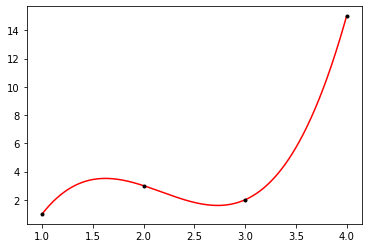

In [14]:
plt.plot(xg, yg, 'r')   # Gráfica de interpolación.
plt.plot(xp, yp, 'k.')  # Puntos dados.

---

Ejemplo 2:

In [15]:
# Dado un conjunto de puntos que por definición son una parábola:
xp = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])
yp = xp**2

In [16]:
lagrange(xp, yp)

poly1d([-3.25260652e-19,  6.07153217e-18, -4.42354486e-17,  1.04083409e-16,
       -8.32667268e-17,  9.71445147e-17,  1.00000000e+00,  8.32667268e-17,
        0.00000000e+00])

In [17]:
pol = lagrange(xp, yp)  # Se almacena el polinomio

In [18]:
pol[9]

0

In [19]:
# Se crea conjunto de 1000 puntos para gráficar
xg = np.linspace(min(xp), max(xp), 1000)
yg = pol(xg)

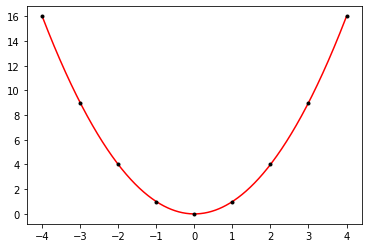

In [20]:
plt.plot(xg, yg, 'r')   # Gráfica de interpolación.
plt.plot(xp, yp, 'k.')  # Puntos dados.

---

Ejemplo 3:

La función `barycentric_interpolate` genera los mismos resultados, sin embargo, no permite determinar el polinomio interpolador, sino que directamente entrega el resultado de interpolación.

In [21]:
# Dado un conjunto de puntos:
xp = [-15, -12, -10, 0, 3, 3.5, 7, 8]
yp = [  1,   2,   3, 4, 5,   6, 7, 8]

In [22]:
# Se crean 1000 puntos para graficar.
xg = np.linspace(min(xp), max(xp), 1000)
yg = barycentric_interpolate(xp, yp, xg)

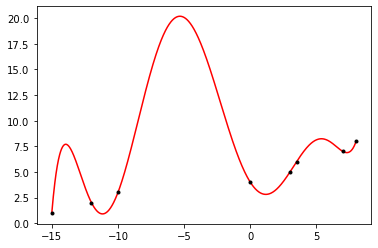

In [23]:
plt.plot(xg, yg, 'r')   # Gráfica de interpolación.
plt.plot(xp, yp, 'k.')  # Puntos dados.

---

**Gráfica interactiva**

In [24]:
def lagrange_inc(x1, x2, x3, x4, x5, x6, y1, y2, y3, y4, y5, y6):
    xp = [x1, x2, x3, x4, x5, x6]
    yp = [y1, y2, y3, y4, y5, y6]
    xg = np.linspace(min(xp), max(xp), 1000)
    yg = barycentric_interpolate(xp, yp, xg)
    plt.plot(xg, yg, 'r')   # Gráfica de interpolación.
    plt.plot(xp, yp, 'k.')  # Puntos dados.

In [25]:
from ipywidgets import interact 
interact(lagrange_inc, x1=(-20, -15, 0.1), x2=(-15, -10, 0.1), 
                       x3=(-10,  -5, 0.1), x4=( -5,   0, 0.1), 
                       x5=(  0,   5, 0.1), x6=(  5,  10, 0.1), 
                       y1=(-20, 20, 0.1), y2=(-20, 20, 0.1), 
                       y3=(-20, 20, 0.1), y4=(-20, 20, 0.1),
                       y5=(-20, 20, 0.1), y6=(-20, 20, 0.1))
None

interactive(children=(FloatSlider(value=-18.0, description='x1', max=-15.0, min=-20.0), FloatSlider(value=-13.…

---

## **2.2.`InterpolatedUnivariateSpline`**

Esta función permite realizar la interpolación de un conjunto de puntos asociados a datos mediante trazadores del grado que se le indique a la función en sus argumentos.

Ejemplo 1: trazadores lineales (k=1)

In [26]:
# Dado un conjunto de puntos:
xp = [-15, -12, -10, 0, 3, 3.5, 7, 8]
yp = [  1,   2,   3, 4, 5,   6, 7, 8]

In [27]:
# La función InterpolatedUnivariateSpline arroja una función similar a lambdify.
InterpolatedUnivariateSpline(xp, yp, k=1)

In [28]:
pol1 = InterpolatedUnivariateSpline(xp, yp, k=1)  # Se almacena la función

In [29]:
type(pol1) # Se verifica el tipo de elemento.

scipy.interpolate.fitpack2.InterpolatedUnivariateSpline

In [30]:
pol1([-15, -12, -10, 0, 3, 3.5, 7, 8])

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [31]:
# Se crean 1000 puntos para graficar.
xg = np.linspace(min(xp), max(xp), 1000)
yg1 = pol1(xg)

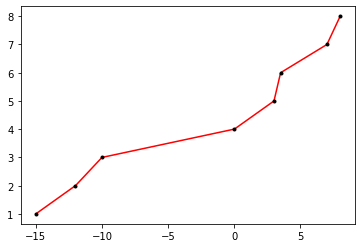

In [32]:
plt.plot(xg, yg1, 'r')   # Gráfica de interpolación.
plt.plot(xp, yp, 'k.')  # Puntos dados.

---

Ejemplo 2: trazadores cuadráticos y cúbicos (k=2,3)

In [33]:
# Se crean las funciones para k=2, k=3, y k=4
pol2 = InterpolatedUnivariateSpline(xp, yp, k=2)
pol3 = InterpolatedUnivariateSpline(xp, yp, k=3)

In [34]:
yg2 = pol2(xg)
yg3 = pol3(xg)

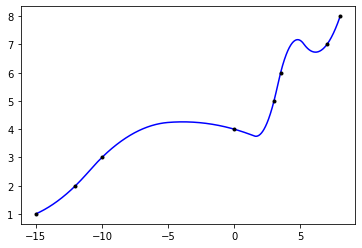

In [35]:
plt.plot(xg, yg2, 'b')
plt.plot(xp, yp, 'k.')

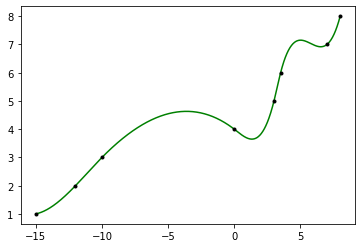

In [36]:
plt.plot(xg, yg3, 'g')
plt.plot(xp, yp, 'k.')

---

**Gráfica interactiva**

In [37]:
def trazadores_int(k):
    xp = [-15, -12, -10, 0, 3, 3.5, 7, 8]
    yp = [  1,   2,   3, 4, 5,   6, 7, 8]
    
    xg = np.linspace(min(xp), max(xp), 1000)
    pol = InterpolatedUnivariateSpline(xp, yp, k=k)
    yg = pol(xg)
    
    plt.plot(xg, yg, 'r')
    plt.plot(xp, yp, 'k.')

In [38]:
from ipywidgets import interact 
interact(trazadores_int, k=(1,8,1))
None

interactive(children=(IntSlider(value=4, description='k', max=8, min=1), Output()), _dom_classes=('widget-inte…

---

## **2.5.3. `interp1d`**

Es una función de interpolación que permite diferentes métodos internamente: ‘linear’, ‘nearest’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’.

In [39]:
# Dado un conjunto de puntos:
xp = [-15, -12, -10, 0, 3, 3.5, 7, 8]
yp = [  1,   2,   3, 4, 5,   6, 7, 8]

In [40]:
# La función InterpolatedUnivariateSpline arroja una función similar a lambdify.
interp1d(xp, yp, kind='previous')

In [41]:
pol = interp1d(xp, yp, kind='previous')  # Se almacena la función.

In [42]:
# Se crean 1000 puntos para graficar.
xg = np.linspace(min(xp), max(xp), 1000)
yg = pol(xg)

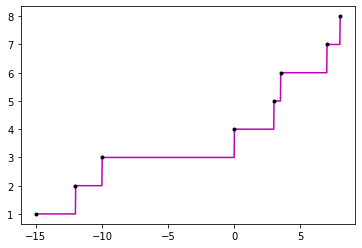

In [43]:
plt.plot(xg, yg, 'm')   # Gráfica de interpolación.
plt.plot(xp, yp, 'k.')  # Puntos dados.

---

---

**Comparación gráfica de los métodos**

In [44]:
def comparacion_int(metodo):
    xp = [-15, -12, -10, 0, 3, 3.5, 7, 8]
    yp = [  1,   2,   3, 4, 5,   6, 7, 8]
    xg = np.linspace(min(xp), max(xp), 1000)
    met_name = ['previous', 'nearest', 'next', 'orden 1', 'orden 2', 'orden 3', 'orden 4', 'orden 5', 'polinómico']
    if metodo==1:
        pol = interp1d(xp, yp, kind='previous')
    elif metodo==2:
        pol = interp1d(xp, yp, kind='nearest')
    elif metodo==3:
        pol = interp1d(xp, yp, kind='next')
    elif 4<=metodo<=8:
        pol = InterpolatedUnivariateSpline(xp, yp, k=metodo-3)
    elif metodo==9:
        pol = lagrange(xp, yp)
    
    yg = pol(xg)
    
    plt.plot(xg, yg, 'b')   # Gráfica de interpolación.
    plt.plot(xp, yp, 'k.')  # Puntos dados
    plt.ylim(0, 22)
    plt.title(met_name[metodo-1])

In [45]:
from ipywidgets import interact 
interact(comparacion_int, metodo=(1,9,1))
None

interactive(children=(IntSlider(value=5, description='metodo', max=9, min=1), Output()), _dom_classes=('widget…

---

**Discusión final sobre el fenómeno de Runge**

In [46]:
def comparacion_int(metodo):
    xp = np.linspace(-1, 1, 11)  # 11 puntos de evaluación entre -1 y 1.
    yp = 1/(1+25*xp**2)
    xg = np.linspace(min(xp), max(xp), 1000)
    met_name = ['previous', 'nearest', 'next', 'orden 1', 'orden 2', 'orden 3', 'orden 4', 'orden 5', 'polinómico']
    if metodo==1:
        pol = interp1d(xp, yp, kind='previous')
    elif metodo==2:
        pol = interp1d(xp, yp, kind='nearest')
    elif metodo==3:
        pol = interp1d(xp, yp, kind='next')
    elif 4<=metodo<=8:
        pol = InterpolatedUnivariateSpline(xp, yp, k=metodo-3)
    elif metodo==9:
        pol = lagrange(xp, yp)
    
    yg = pol(xg)
    
    xr = np.linspace(-1, 1, 1000)  # 11 puntos de evaluación entre -1 y 1.
    yr = 1/(1+25*xr**2)
    
    plt.plot(xr, yr, 'm')   # Gráfica de interpolación.
    plt.plot(xg, yg, 'b')   # Gráfica de interpolación.
    plt.plot(xp, yp, 'k.')  # Puntos dados
    plt.ylim(0, 1.2)
    plt.title(met_name[metodo-1])

In [47]:
from ipywidgets import interact 
interact(comparacion_int, metodo=(1,9,1))
None

interactive(children=(IntSlider(value=5, description='metodo', max=9, min=1), Output()), _dom_classes=('widget…

Entre más estable el método, más compleja es su solución. La interpolación polinomial permite describir todo con una sola ecuación, pero no genera resultados confiables siempre.

---